## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [1]:
#Generamos la conexión al Drive, para importar documentos
#luego habilitamos la opcion de importar documentos desde drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
#Importamos las librerias que requerimos para nuestro analisis
import pandas as pd
import numpy as np
#===============================================================================
# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#===============================================================================
# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.impute import SimpleImputer

#===============================================================================
import warnings
warnings.filterwarnings('ignore')

In [51]:
#creamos nuestro DF para empezar a trabajar y le damos una primera vista con la funcion head, usamos una codificacion distinta a la estandar ya que hay varias celdas con caracteres especiales
df = pd.read_csv('/content/drive/MyDrive/Proyecto_M7_CCDD/Oscars_Estadisticas_Demograficas.csv', encoding='ISO-8859-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


# **EDA.**

In [28]:
#Revisamos el tamaño por medio de "shape" , donde vemos Registros y columnas respectivamente
df.shape

(441, 27)

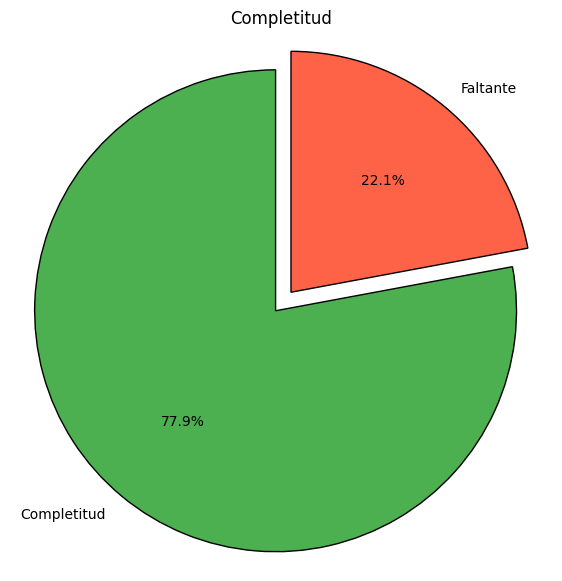

In [31]:
#Revisamos porcentaje de completitud


completitud = df.count().sum() / df.size * 100
faltante = 100 - completitud

# Crear los datos para el gráfico circular
labels = ['Completitud', 'Faltante']
sizes = [completitud, faltante]
colors = ['#4CAF50', '#FF6347']  # Verde para completitud, Rojo para faltante
explode = (0.1, 0)  # Explosión para resaltar la parte de completitud

# gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Completitud')
plt.axis('equal')
plt.show()

un 77,9% de completitud no es un valor ideal, por lo que es necesario revisar los datos y ver si el eliminar columnas no útiles para nuestro análisis, permita mejorar la completitud

In [34]:
#Valores duplicados
VDuplicados = df[df.duplicated()]

if VDuplicados.empty:
    print("No existem duplicados")
else:
    print("Si existen duplicados")

No existem duplicados


In [36]:
#viasualizo las columnas de tal forma eliminar las innecesarias (consideré la descripcion disponible en KAggle)
df.columns.tolist()

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'birthplace',
 'birthplace:confidence',
 'date_of_birth',
 'date_of_birth:confidence',
 'race_ethnicity',
 'race_ethnicity:confidence',
 'religion',
 'religion:confidence',
 'sexual_orientation',
 'sexual_orientation:confidence',
 'year_of_award',
 'year_of_award:confidence',
 'award',
 'biourl',
 'birthplace_gold',
 'date_of_birth_gold',
 'movie',
 'person',
 'race_ethnicity_gold',
 'religion_gold',
 'sexual_orientation_gold',
 'year_of_award_gold']

In [52]:
# Elimino las columnas que no serán útiles en nuestromodelo
# Considerando "race_ethnicity" como columna objetivo
# Columnas a eliminar
columnas_a_eliminar = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
                       '_last_judgment_at', 'birthplace:confidence', 'date_of_birth:confidence',
                       'race_ethnicity:confidence', 'religion:confidence',
                       'sexual_orientation:confidence', 'year_of_award:confidence',
                       'biourl', 'birthplace_gold', 'date_of_birth_gold', 'movie',
                       'person', 'race_ethnicity_gold', 'religion_gold',
                       'sexual_orientation_gold', 'birthplace', 'religion','year_of_award_gold']

df = df.drop(columns=columnas_a_eliminar)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_of_birth       441 non-null    object
 1   race_ethnicity      441 non-null    object
 2   sexual_orientation  441 non-null    object
 3   year_of_award       441 non-null    int64 
 4   award               441 non-null    object
dtypes: int64(1), object(4)
memory usage: 17.4+ KB


In [41]:
df.shape

(441, 5)

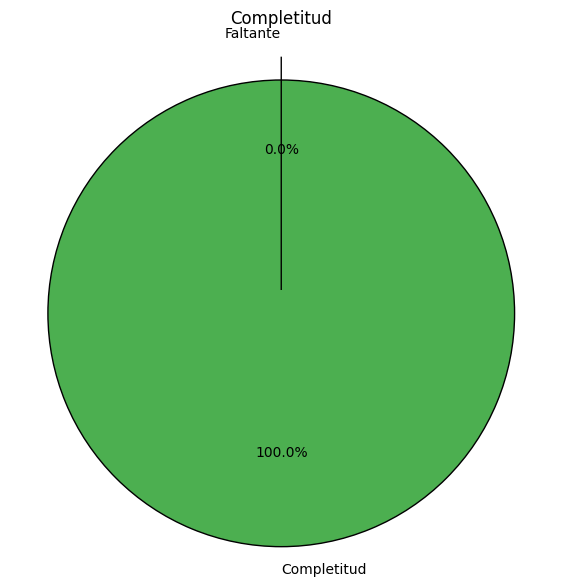

In [48]:
#ya tengo una idea del tamaño del dataset y del tipo de datos que tengo, asi que ahora voy a sacar su porcentaje de completitud
completitud = df.count().sum() / df.size * 100
faltante = 100 - completitud

# Crear los datos para el gráfico circular
labels = ['Completitud', 'Faltante']
sizes = [completitud, faltante]
colors = ['#4CAF50', '#FF6347']  # Verde para completitud, Rojo para faltante
explode = (0.1, 0)  # Explosión para resaltar la parte de completitud

# gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Completitud')
plt.axis('equal')
plt.show()

**Claramente con dejar sólo las columnas útiles para el ejercicio que se está solicitando, la completitud cambia a un 100%**

In [53]:
# En la columna date_of_birth, dejamos disponible sólo el año
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

df['date_of_birth'] = df['date_of_birth'].dt.year.astype('Int64')

In [56]:
df.head()

,date_of_birth,race_ethnicity,sexual_orientation,year_of_award,award
0,1895,White,Straight,1927,Best Director
1,1886,White,Straight,1930,Best Director
2,1895,White,Straight,1931,Best Director
3,1899,White,Straight,1932,Best Director
4,1894,White,Straight,1933,Best Director


In [57]:
#veo que tipos de valores tengo en mi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_of_birth       78 non-null     Int64 
 1   race_ethnicity      441 non-null    object
 2   sexual_orientation  441 non-null    object
 3   year_of_award       441 non-null    int64 
 4   award               441 non-null    object
dtypes: Int64(1), int64(1), object(3)
memory usage: 17.8+ KB


In [66]:
#ahora necesito saber si mi DF tienen valores NaN
tiene_nan = df.isna().any().any()

print(f"Mi DataFrame tienen algun NaN values? {tiene_nan}")

Mi DataFrame tienen algun NaN values? True


In [63]:
# Crear variables dummy para las variables categóricas "sexual_orientation", "race_ethnicity" y "award"
df = pd.get_dummies(df, columns=['sexual_orientation', 'award', 'race_ethnicity' ])
df.head()

,date_of_birth,year_of_award,sexual_orientation_Bisexual,sexual_orientation_Gay,sexual_orientation_Lesbian,sexual_orientation_Matter of Dispute,sexual_orientation_Na,sexual_orientation_Straight,award_Best Actor,award_Best Actress,award_Best Director,award_Best Supporting Actor,award_Best Supporting Actress,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White
0,1895,1927,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
1,1886,1930,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
2,1895,1931,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,1899,1932,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
4,1894,1933,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   date_of_birth                         78 non-null     Int64
 1   year_of_award                         441 non-null    int64
 2   sexual_orientation_Bisexual           441 non-null    bool 
 3   sexual_orientation_Gay                441 non-null    bool 
 4   sexual_orientation_Lesbian            441 non-null    bool 
 5   sexual_orientation_Matter of Dispute  441 non-null    bool 
 6   sexual_orientation_Na                 441 non-null    bool 
 7   sexual_orientation_Straight           441 non-null    bool 
 8   award_Best Actor                      441 non-null    bool 
 9   award_Best Actress                    441 non-null    bool 
 10  award_Best Director                   441 non-null    bool 
 11  award_Best Supporting Actor           441 non

In [64]:
#usaremos un mapa de calor para ver la correlacion de nuestras variables
corr = df.corr()
corr.style.background_gradient(cmap='YlGn')

,date_of_birth,year_of_award,sexual_orientation_Bisexual,sexual_orientation_Gay,sexual_orientation_Lesbian,sexual_orientation_Matter of Dispute,sexual_orientation_Na,sexual_orientation_Straight,award_Best Actor,award_Best Actress,award_Best Director,award_Best Supporting Actor,award_Best Supporting Actress,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White
date_of_birth,1.000000,0.325590,0.003542,0.102266,nan,-0.009963,-0.237376,0.061867,-0.047827,0.003542,0.112220,-0.053585,-0.022637,nan,-0.009963,nan,nan,nan,0.009963
year_of_award,0.325590,1.000000,-0.101795,-0.049249,0.048743,0.018967,0.056443,0.047371,-0.034881,-0.026822,-0.038298,0.043324,0.059856,0.069091,0.176943,0.033747,0.023504,0.054367,-0.190230
sexual_orientation_Bisexual,0.003542,-0.101795,1.000000,-0.028398,-0.015093,-0.018506,-0.035764,-0.671667,0.021568,0.038234,0.043853,-0.106867,-0.001285,-0.021393,-0.041959,-0.030394,-0.010660,-0.015093,0.060412
sexual_orientation_Gay,0.102266,-0.049249,-0.028398,1.000000,-0.008572,-0.010511,-0.020313,-0.381481,-0.018014,-0.066547,0.069739,0.079202,-0.062057,-0.012150,-0.023831,-0.017263,-0.006054,-0.008572,0.034312
sexual_orientation_Lesbian,nan,0.048743,-0.015093,-0.008572,1.000000,-0.005586,-0.010796,-0.202746,-0.033701,0.128813,-0.034417,-0.032258,-0.032981,-0.006458,-0.012666,-0.009175,-0.003218,-0.004556,0.018236
sexual_orientation_Matter of Dispute,-0.009963,0.018967,-0.018506,-0.010511,-0.005586,1.000000,-0.013237,-0.248595,0.027704,-0.043366,-0.042200,0.031353,0.029497,-0.007918,0.136662,-0.011249,-0.003945,-0.005586,-0.087202
sexual_orientation_Na,-0.237376,0.056443,-0.035764,-0.020313,-0.010796,-0.013237,1.000000,-0.480431,-0.079858,-0.013072,-0.045625,0.110423,0.032431,-0.015302,0.130418,-0.021740,-0.007625,-0.010796,-0.072281
sexual_orientation_Straight,0.061867,0.047371,-0.671667,-0.381481,-0.202746,-0.248595,-0.480431,1.000000,0.033699,-0.009599,-0.017213,-0.015920,0.009221,0.031851,-0.062754,0.045251,0.015871,0.022471,0.000204
award_Best Actor,-0.047827,-0.034881,0.021568,-0.018014,-0.033701,0.027704,-0.079858,0.033699,1.000000,-0.261624,-0.254590,-0.238624,-0.243971,-0.047769,0.031514,-0.025354,0.095482,0.050742,-0.022840
award_Best Actress,0.003542,-0.026822,0.038234,-0.066547,0.128813,-0.043366,-0.013072,-0.009599,-0.261624,1.000000,-0.267184,-0.250428,-0.256040,-0.050132,-0.098325,-0.071224,-0.024980,0.046723,0.119662


Mejores parámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9325842696629213
F1-Score: 0.9325842696629213


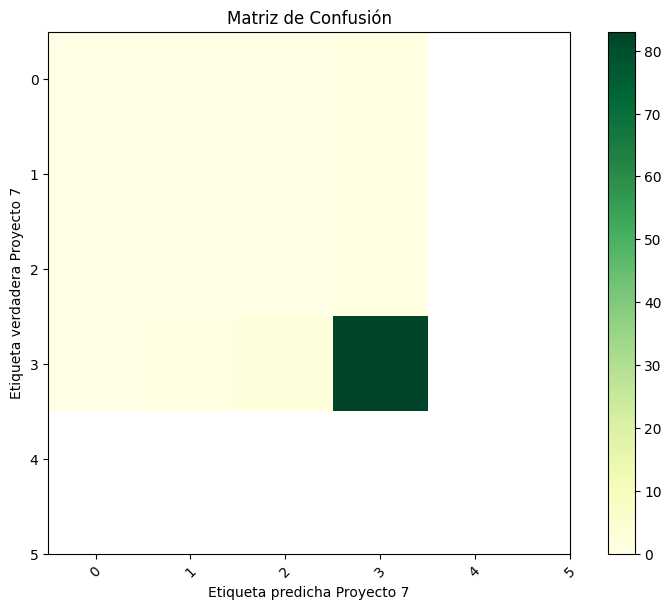

In [67]:
# Se usará como modelo Random Forest
# El objetivo es clasificar la etnicidad del ganador
#Esto permitirá buscar la mejor combinación  para mejorar la precisión del modelo.

# Preparación de datos
X = df.drop(columns=[col for col in df.columns if 'race_ethnicity' in col])
y = df[[col for col in df.columns if 'race_ethnicity' in col]].idxmax(axis=1)
y = LabelEncoder().fit_transform(y)

# Dado que existen NaNs, debemos imputarlos
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


class_weights = 'balanced'
model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# creamos modelo modelo más óptimo
modelo_optimo = grid_search.best_estimator_

# predicciones
y_pred = modelo_optimo.predict(X_test)

# Evaluamos
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# Matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.YlGn)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.tight_layout()
plt.ylabel('Etiqueta verdadera Proyecto 7')
plt.xlabel('Etiqueta predicha Proyecto 7')
plt.show()

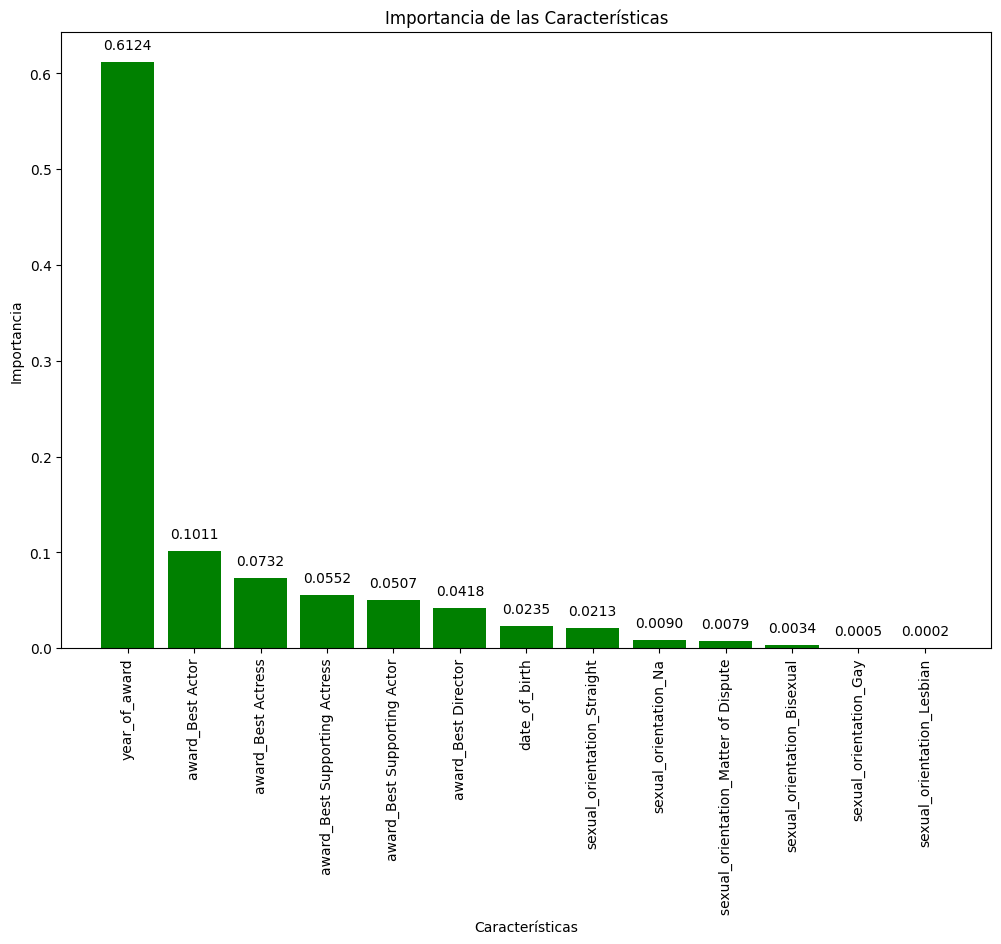

In [74]:
#La Gráfica de Importancia de las Características complementa la accuracy y el F1-score, al proporcionar insights sobre qué características están influyendo más en las predicciones del modelo

feature_importances = modelo_optimo.feature_importances_

# Obteniendo los nombres de las características
feature_names = X.columns

# Ordenando las características por importancia
indices = np.argsort(feature_importances)[::-1]

# Creando la gráfica
plt.figure(figsize=(12, 8))
plt.title("Importancia de las Características")
bars = plt.bar(range(X.shape[1]), feature_importances[indices],
               color="green", align="center")

# Añadiendo los valores sobre cada barra
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

# **Actividad 4. API REST**

In [75]:
!pip install flask pyngrok

In [76]:
from pyngrok import ngrok
ngrok.set_auth_token('2teLAFnZ59aUHuqz1UoC6dNaBlV_35pRepjj8J8cHxQf4jZTH')  #este código debe generarse en ngrok , cambiar de acuerdo al que se crea con cada cuenta registrada

In [78]:
from flask import Flask, request, jsonify
from pyngrok import ngrok

#Flask
app = Flask(__name__)

# Ruta y Método
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = [0]  # Simulamos de una predicción
    return jsonify({'prediction': str(prediction)})

ngrok.kill()

# Iniciamos el tunelado
ngrok_tunnel = ngrok.connect(5000)
print('Public URL:', ngrok_tunnel.public_url)

app.run(port=5000, debug=False, use_reloader=False)


Public URL: https://b4b5-104-196-149-253.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Mar/2025 17:50:39] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2025 17:50:40] "GET /favicon.ico HTTP/1.1" 404 -


In [80]:
import requests
import json

# URL de la API
url = 'https://4064-35-221-173-193.ngrok-free.app'

# Datos de entrada
data = {
    'edad': 26,
    'categoria_premio': 'Best Supporting Actor',
    'año': 1999
}

# Pasamos datos a JSON y se envía la solicitud POST a la API
response = requests.post(url, json=data)

# Imprimos la respuesta
print(response.text)


<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/ibm-plex-mono/IBMPlexMono-Tex